# Signals and Systems for Dummies, Chapter 8

## Beat signal

In [44]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
# import mplcursors

# %matplotlib ipympl
%matplotlib inline

In [20]:
fc = 440
Tc = 1/fc
Ts = Tc/50

fmod = 5
Tmod = 1/5
d = 1*Tmod

t = np.linspace(0, d, np.round(d/Ts).astype("int"))

xmod = np.cos(2*np.pi*fmod*t)
x = np.cos(2*np.pi*fc*t)*xmod
# x = np.cos(2*np.pi*(fc+fmod)*t) + np.cos(2*np.pi*(fc-fmod)*t)

Text(0.5, 1.0, '440Hz x 5Hz')

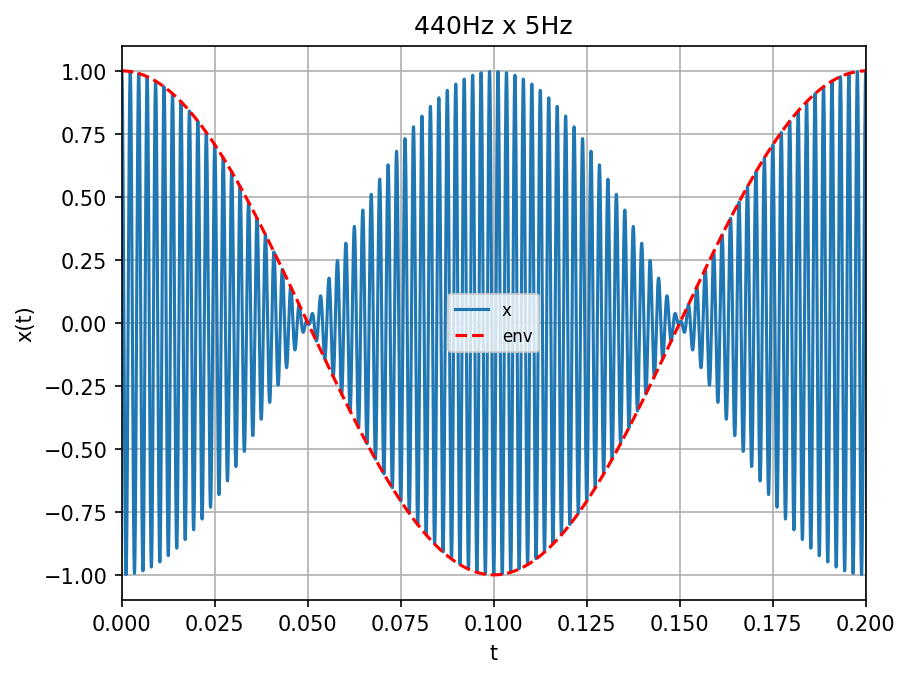

In [18]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, xmod, 'r--', label="env")
# ax.plot(t, -xmod, 'r--')
ax.set_xlim(left=0, right=d)
ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
ax.set_title("440Hz x 5Hz")

## Fourier series for pulse train/square wave

In [205]:
A = 1
fo = 1
To = 1/fo
tau = To/8
tau = To/2
# tau = To/100

sidelobe = 1/fo/tau
k = np.arange(np.floor(-7*sidelobe), np.floor(7*sidelobe+1))
k = np.arange(np.floor(-24*sidelobe), np.floor(24*sidelobe+1))
k = np.arange(np.floor(-6*sidelobe), np.floor(6*sidelobe+1))
Xk = A*tau/To*np.sinc(k*fo*tau)*np.exp(-1j*np.pi*k*fo*tau)
f = k*fo

Text(0.5, 0.98, 'CT Rectangular Pulse Train, fo=1, tau=0.5')

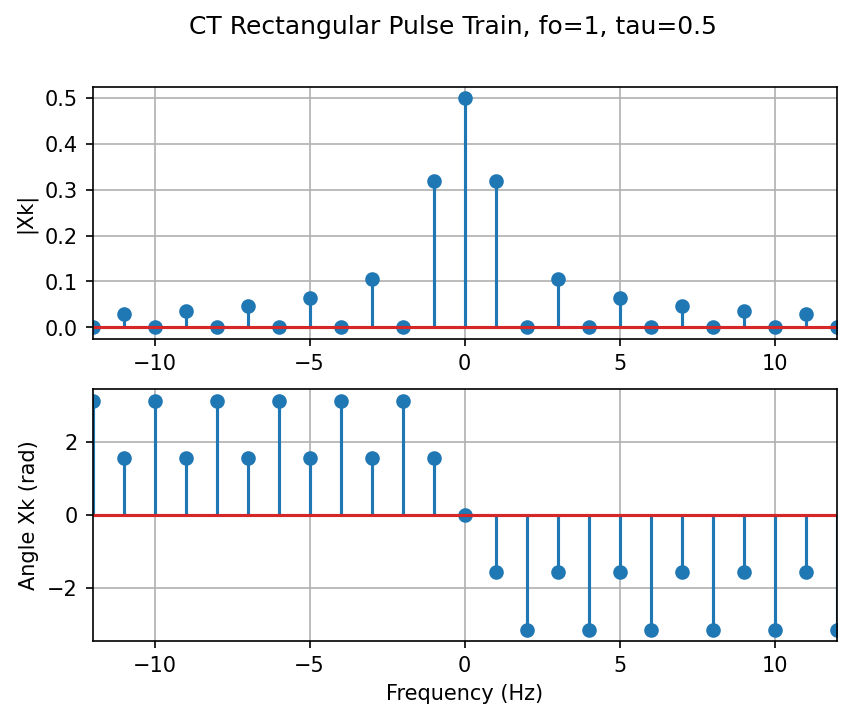

In [206]:
fig, axs = plt.subplots(nrows=2, sharex=True, dpi=150)
axs[0].stem(f, np.abs(Xk))
axs[0].set_ylabel("|Xk|")
# axs[0].set_xlabel("Frequency (Hz)")
axs[0].tick_params(labelbottom=True)
axs[0].grid()
axs[1].stem(f, np.angle(Xk))
# axs[1].set_ylim(bottom=-np.pi, top=np.pi)
axs[1].set_xlim(left=f.min(), right=f.max())
axs[1].set_ylabel("Angle Xk (rad)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].grid()
fig.suptitle(f"CT Rectangular Pulse Train, fo={fo}, tau={tau}")

### Reconstruction

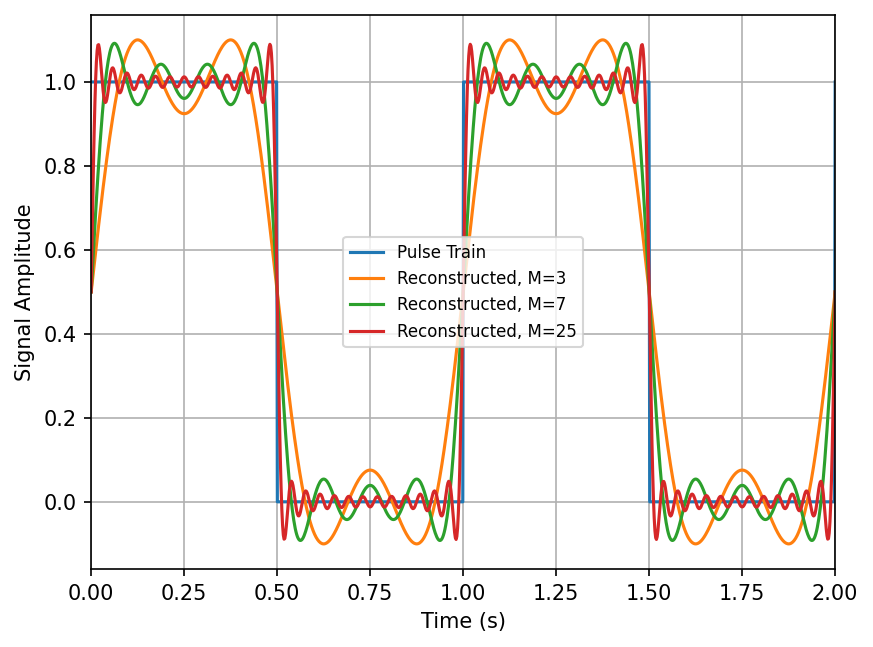

In [ ]:
orders = [3, 7, 25]

t = np.linspace(0, 2*To, 1000)
x = A*(np.mod(t, To) <= tau)

fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="Pulse Train")

for o in orders:
    i = (k >= -o) & (k <= o)
    kr = k[i]
    Xr = Xk[i]
    kr_mat = np.tile(kr[np.newaxis, :], [len(t), 1])
    t_mat = np.tile(t[:, np.newaxis], [1, len(kr)])
    cmplx_sins = np.exp(1j*2*np.pi*kr_mat*fo*t_mat)
    Xr = Xr[:, np.newaxis]
    xr = (cmplx_sins @ Xr).real
    ax.plot(t, xr.real, label=f"Reconstructed, M={o}")

ax.set_xlim(left=0, right=t.max())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal Amplitude")
ax.grid()
ax.legend(fontsize=8)

## Fourier series for triangle wave

In [244]:
A = 1
fo = 1
To = 1/fo
tau = To/2
# tau = To/100

sidelobe = 1/fo/tau
k = np.arange(np.floor(-8*sidelobe), np.floor(8*sidelobe+1))
Xk = -2*A/np.pi**2/k**2
Xk[np.mod(k, 2) == 0] = 0
Xk[k == 0] = A/2
f = k*fo

/tmp/ipykernel_35227/1841801977.py:9: RuntimeWarning: divide by zero encountered in divide
  Xk = -2*A/np.pi**2/k**2


Text(0.5, 0.98, 'CT Triangle Wave, fo=1, tau=0.5')

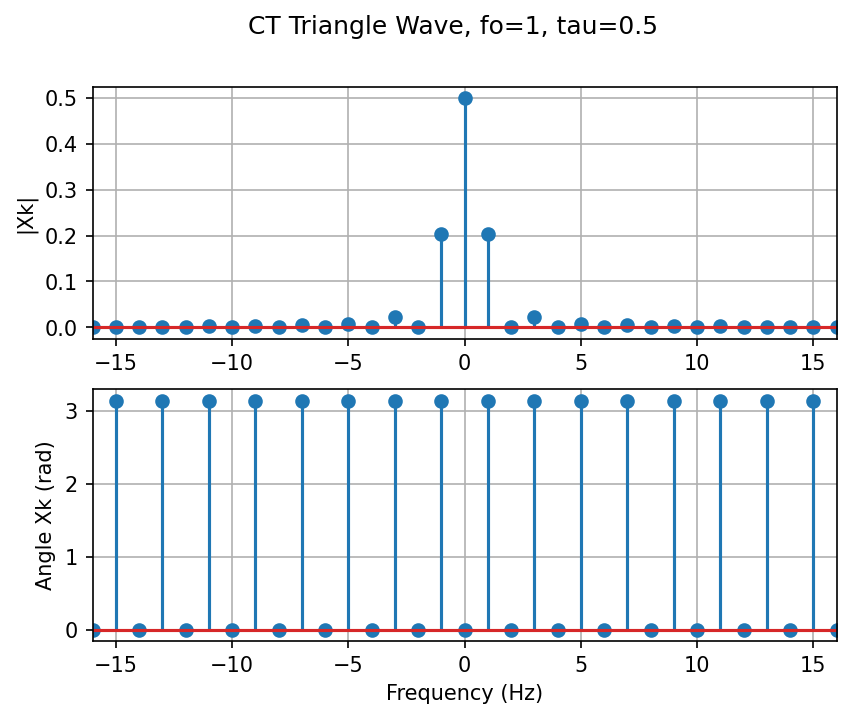

In [245]:
fig, axs = plt.subplots(nrows=2, sharex=True, dpi=150)
axs[0].stem(f, np.abs(Xk))
axs[0].set_ylabel("|Xk|")
# axs[0].set_xlabel("Frequency (Hz)")
axs[0].tick_params(labelbottom=True)
axs[0].grid()
axs[1].stem(f, np.angle(Xk))
# axs[1].set_ylim(bottom=-np.pi, top=np.pi)
axs[1].set_xlim(left=f.min(), right=f.max())
axs[1].set_ylabel("Angle Xk (rad)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].grid()
fig.suptitle(f"CT Triangle Wave, fo={fo}, tau={tau}")

### Reconstruction

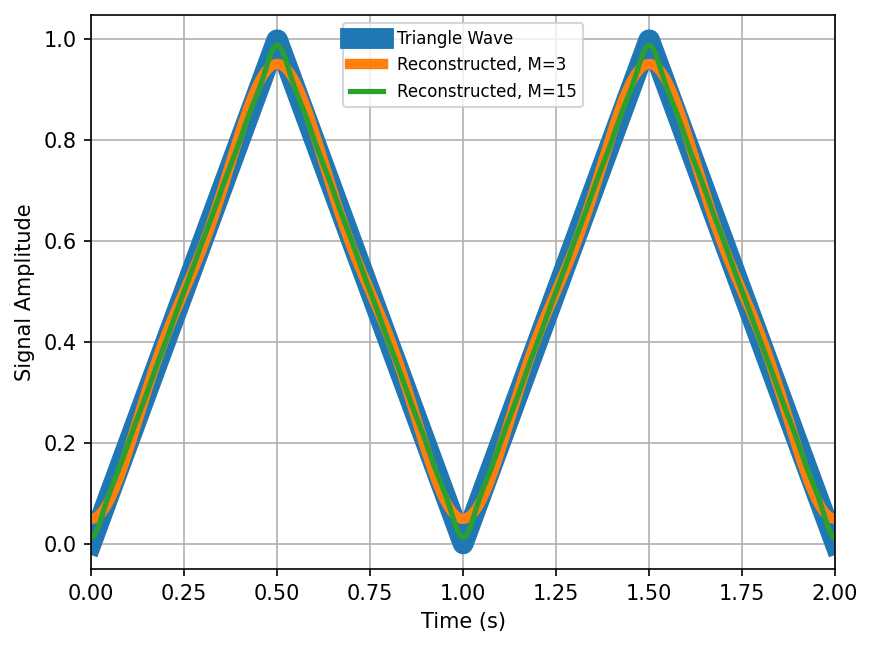

In [250]:
orders = [3, 15]

t = np.linspace(0, To, 500)
x = np.zeros_like(t)
x[t < To/2] = 2*t[t < To/2]/To
x[t >= To/2] = 2*(To-t[t >= To/2])/To

t = np.concatenate((t, t+To))
x = np.tile(x, 2)

fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="Triangle Wave", linewidth=10)

for idx, o in enumerate(orders):
    i = (k >= -o) & (k <= o)
    kr = k[i]
    Xr = Xk[i]
    kr_mat = np.tile(kr[np.newaxis, :], [len(t), 1])
    t_mat = np.tile(t[:, np.newaxis], [1, len(kr)])
    cmplx_sins = np.exp(1j*2*np.pi*kr_mat*fo*t_mat)
    Xr = Xr[:, np.newaxis]
    xr = (cmplx_sins @ Xr).real
    ax.plot(t, xr.real, label=f"Reconstructed, M={o}", linewidth = 10/2**(idx+1))

ax.set_xlim(left=0, right=t.max())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal Amplitude")
ax.grid()
ax.legend(fontsize=8)

### Square wave vs. triangle wave rolloff

/tmp/ipykernel_35227/1379124801.py:10: RuntimeWarning: divide by zero encountered in divide
  Xk_tri = -2*A/np.pi**2/k**2
/tmp/ipykernel_35227/1379124801.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.stem(f, 20*np.log10(np.abs(Xk)/np.max(np.abs(Xk))), linefmt="C0", label="Square Wave")
/tmp/ipykernel_35227/1379124801.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.stem(f, 20*np.log10(np.abs(Xk_tri)/np.max(np.abs(Xk_tri))), linefmt="C1", label="Triangle Wave")


Text(0.5, 1.0, 'Square Wave vs. Triangle Wave Rolloff')

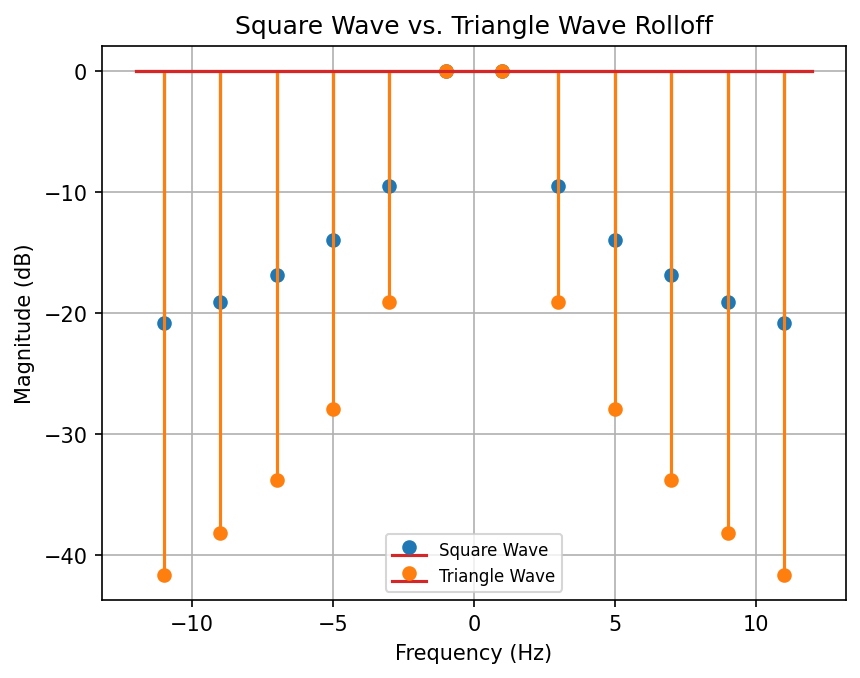

In [235]:
A = 1
fo = 1
To = 1/fo
tau = To/2

sidelobe = 1/fo/tau
k = np.arange(np.floor(-6*sidelobe), np.floor(6*sidelobe+1))
Xk = A*tau/To*np.sinc(k*fo*tau)*np.exp(-1j*np.pi*k*fo*tau) # rectangle
Xk[np.mod(k, 2) == 0] = 0
Xk_tri = -2*A/np.pi**2/k**2
Xk_tri[np.mod(k, 2) == 0] = 0
f = k*fo

fig, ax = plt.subplots(dpi=150)
ax.stem(f, 20*np.log10(np.abs(Xk)/np.max(np.abs(Xk))), linefmt="C0", label="Square Wave")
ax.stem(f, 20*np.log10(np.abs(Xk_tri)/np.max(np.abs(Xk_tri))), linefmt="C1", label="Triangle Wave")
ax.grid()
# ax.set_ylim(bottom=-60, top=1)
ax.legend(fontsize=8)
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("Frequency (Hz)")
ax.set_title("Square Wave vs. Triangle Wave Rolloff")